# Instituto de Educação Superior de Brası́lia – IESB
## Pós-Graduação em Inteligência Artificial
### Deep Learning e Redes Neurais

### Atividade 2 - Classificação de imagens na base de dados CIFAR-10 com CNN e Data Augmentation

#### Descrição do Dataset CIFAR-10

O dataset CIFAR-10 consiste de 60 mil imagens coloridas, com 10 classes distintas igualmente balanceadas (isto é, 6 mil imagens por classe).

O conjunto é separado em 50 mil imagens para treinamento e 10 mil para teste.

As imagens são de animais e objetos, com as seguintes classes:


  - 0 - Avião										
  - 1 - Automóvel
  - 2 - Pássaro
  - 3 - Gato
  - 4 - Cervo
  - 5 - Cachorro
  - 6 - Sapo
  - 7 - Cavalo
  - 8 - Barco
  - 9 - Caminhão

Fonte: https://www.cs.toronto.edu/~kriz/cifar.html

# Parte A

## 1) Dataset

 - Carregue o dataset.
```python
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

 - Escolha, aletoriamente (e de forma automatizada), 16 imagens na base de treino, e apresente-as visualmente em um gráfico 4x4 (subplot).
 
 
 - Verifique se as dimensões dos tensores estão de acordo com a descrição do dataset.


 - Realize, caso necessário, pré-processamento nos dados. (Ex: normalização, padronização, codificação de classes, etc).

In [1]:
# Insira seu código aqui
from random import choice

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

%matplotlib notebook

In [2]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255

In [4]:
CLASSES = {
    0: 'Avião', 1: 'Automóvel', 2: 'Pássaro', 3: 'Gato', 4: 'Cervo', 5: 'Cachorro',
    6: 'Sapo', 7: 'Cavalo', 8: 'Barco', 9: 'Caminhão'
}

In [5]:
def _sample_images(x, y, num: int):
    _r = range(x.shape[0])
    _l = []
    for _ in range(num):
        i = choice(_r)
        _l.append((x[i], y[i]))
    return _l

<IPython.core.display.Javascript object>


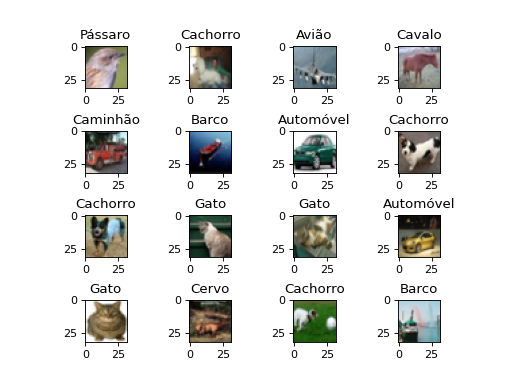

In [6]:
SAMPLE_IMAGES = _sample_images(xtrain, ytrain, 16)

PLT_ROWS, PLT_COLS, PLT_INDEX = 4, 4, 1

fig = plt.Figure(figsize=(8, 8))

for p in SAMPLE_IMAGES:
    plt.subplot(PLT_ROWS, PLT_COLS, PLT_INDEX)
    plt.title(CLASSES[p[1][0]])
    plt.imshow(p[0])
    PLT_INDEX += 1

plt.subplots_adjust(wspace=0.25, hspace=1.0)
plt.show()

## 2) Implementação do Modelo CNN

### 2.1 Arquitetura

 - Defina uma função que implemente uma arquitera de Rede Convolucional (utilizando o Keras) e retorne um objeto desse seu modelo.
 
 
 - A escolha de parâmetros do modelo, como, por exemplo, *quantidade de camadas convolucionais*, *quantidade de filtros em cada cada camada convolucional*, *quantidade de camadas densas*,  *funções de ativação*, fica a critério do projetista. 


 - Instancie um modelo usando a função implementada, e apresente um resumo da arquitetura.

In [7]:
# Insira seu código aqui
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [8]:
ytrain = np_utils.to_categorical(ytrain, 10)
ytest = np_utils.to_categorical(ytest, 10)

In [9]:
def modelo_cifar10():

    keras.backend.clear_session()

    clf = Sequential()

    clf.add(layer=Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name='conv1',
                    input_shape=xtrain.shape[1:]))
    clf.add(layer=MaxPooling2D(pool_size=(2, 2), name='maxpool1'))

    clf.add(layer=Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='conv2'))
    clf.add(layer=MaxPooling2D(pool_size=(2, 2), name='maxpool2'))

    clf.add(layer=Flatten(name='flatten'))

    clf.add(layer=Dense(units=128, activation='relu', name='dense1'))
    clf.add(Dropout(rate=0.2, name='dropout1'))

    clf.add(layer=Dense(units=10, activation='softmax', name='softmax'))

    print(clf.summary())

    return clf

In [10]:
clf = modelo_cifar10()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 15, 15, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 13, 13, 64)        18496     
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               295040    
_________________________________________________________________
dropout1 (Dropout)           (None, 128)               0

### 2.2 Compilação

 - Baseado no problema descrito, defina a função custo que será otimizada, e qual otimizador será utilizado.
 
 
 - Defina também quais métricas serão avaliadas pelo modelo durante a etapa de treinamento e de validação.

In [21]:
clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

### 2.3 Treinamento e Validação 
 
 - Defina a quantidade máxima de épocas para o treinamento.
 
 
 - Utilize alguma rotina de *callback* para que o treinamento não dure o máximo de épocas definido, caso isso não seja necessário.


 - Utilize 20% da base de treino para validar o modelo a cada época.  <br>


 - Mostre em um gráfico o comportamento da função custo (*loss*) e da acurácia, ao longo das epócas, para as bases de treino e de validação.

In [12]:
# Insira seu código aqui
es = EarlyStopping(monitor='loss',
                   min_delta=1e-10,
                   patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='cifar10-weights.h5',
                      save_best_only=True,
                      monitor='loss',
                      verbose=1)

In [13]:
clf_history = clf.fit(x=xtrain, y=ytrain,
                      batch_size=120, epochs=40,
                      validation_data=(xtest, ytest),
                      validation_split=0.2,
                      callbacks=[es, mcp])

Epoch 1/40
334/334 [==============================] - 12s 20ms/step - loss: 1.9369 - accuracy: 0.2992 - val_loss: 1.5736 - val_accuracy: 0.4439

Epoch 00001: loss improved from inf to 1.73869, saving model to cifar10-weights.h5
Epoch 2/40
334/334 [==============================] - 6s 19ms/step - loss: 1.4121 - accuracy: 0.4961 - val_loss: 1.3319 - val_accuracy: 0.5372

Epoch 00002: loss improved from 1.73869 to 1.36332, saving model to cifar10-weights.h5
Epoch 3/40
334/334 [==============================] - 6s 19ms/step - loss: 1.2135 - accuracy: 0.5684 - val_loss: 1.2915 - val_accuracy: 0.5514

Epoch 00003: loss improved from 1.36332 to 1.19556, saving model to cifar10-weights.h5
Epoch 4/40
334/334 [==============================] - 6s 19ms/step - loss: 1.1019 - accuracy: 0.6161 - val_loss: 1.1620 - val_accuracy: 0.5902

Epoch 00004: loss improved from 1.19556 to 1.08535, saving model to cifar10-weights.h5
Epoch 5/40
334/334 [==============================] - 6s 19ms/step - loss: 1.02


Epoch 00036: loss improved from 0.20863 to 0.20112, saving model to cifar10-weights.h5
Epoch 37/40
334/334 [==============================] - 6s 19ms/step - loss: 0.1936 - accuracy: 0.9339 - val_loss: 1.6599 - val_accuracy: 0.6956

Epoch 00037: loss did not improve from 0.20112
Epoch 38/40
334/334 [==============================] - 6s 19ms/step - loss: 0.1936 - accuracy: 0.9348 - val_loss: 1.7940 - val_accuracy: 0.7005

Epoch 00038: loss did not improve from 0.20112
Epoch 39/40
334/334 [==============================] - 6s 19ms/step - loss: 0.1999 - accuracy: 0.9342 - val_loss: 1.7534 - val_accuracy: 0.7008

Epoch 00039: loss did not improve from 0.20112
Epoch 40/40
334/334 [==============================] - 6s 19ms/step - loss: 0.1901 - accuracy: 0.9365 - val_loss: 1.7452 - val_accuracy: 0.7013

Epoch 00040: loss improved from 0.20112 to 0.19722, saving model to cifar10-weights.h5


In [14]:
def plot_history(history):
    plt.figure(figsize=(8,4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplots_adjust(wspace=0.25, hspace=1.0, bottom=0.2)
    plt.show()

<IPython.core.display.Javascript object>


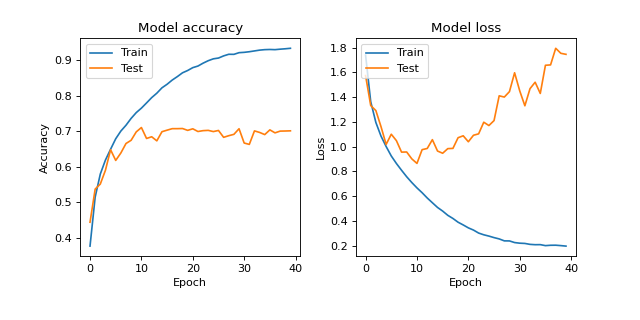

In [15]:
plot_history(clf_history)

### 2.4 Desempenho na Base de Teste

 - Realize, com o modelo treinado, predições na base de teste (método *predict*).
 

 - Com as predições, calcule a precisão e a revocação para cada classe.  <br>
   (Pode ser utilizada a função *classification_report* do *scikit-learn* ou alguma outra similar).

In [16]:
from sklearn.metrics import classification_report

In [18]:
LIMIAR = 0.5

In [19]:
pred = clf.predict(xtest)
pred_argmax = [np.argmax(x) for x in (pred > LIMIAR)]
ytest_argmax = [np.argmax(x) for x in ytest]

In [20]:
print(classification_report(y_true=ytest_argmax, y_pred=pred_argmax))

              precision    recall  f1-score   support

           0       0.58      0.80      0.67      1000
           1       0.83      0.79      0.81      1000
           2       0.56      0.60      0.58      1000
           3       0.55      0.47      0.50      1000
           4       0.61      0.72      0.66      1000
           5       0.68      0.50      0.57      1000
           6       0.76      0.79      0.77      1000
           7       0.76      0.73      0.74      1000
           8       0.88      0.72      0.79      1000
           9       0.77      0.80      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



# Parte B: Data Augmentation

## 1) Recarregue o Dataset CIFAR-10


 - Recarregue o dataset CIFAR-10, conforme feito na parte A, porém sem realizar pré-processamentos.


 - Utilize a classe **ImageDataGenerator** do Keras para fazer os pré-processamentos adequados, e aplicar as transformações nas imagens, de forma a gerar novos exemplos para o treinamento (*data augmentation*). A escolha das transformações é livre ao projetista.


 - Mostre em um gráfico 4x4 (subplot), 16 exemplos aleatórios dessas imagens transformadas, com seus respectivos rótulos.


 - Configure 20% dos dados para validação. Isso deve ser feito durante o instanciamento do objeto que irá manipular o dataset.
 
 
 - Obs: Aplique as transformações apenas no conjunto de treino retornado pela função *cifar10.load_data()*. No conjunto de teste, apenas os pré-processamentos devem ser utilizados (não utilize *data augmentation* nessa base)

In [64]:
from keras.preprocessing.image import ImageDataGenerator

In [97]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [98]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255

In [99]:
ytrain = np_utils.to_categorical(ytrain, 10)
ytest = np_utils.to_categorical(ytest, 10)

In [100]:
datagen = ImageDataGenerator(validation_split=0.2)
datagen.fit(xtrain)

In [101]:
gen_train = datagen.flow(xtrain, ytrain)

<IPython.core.display.Javascript object>


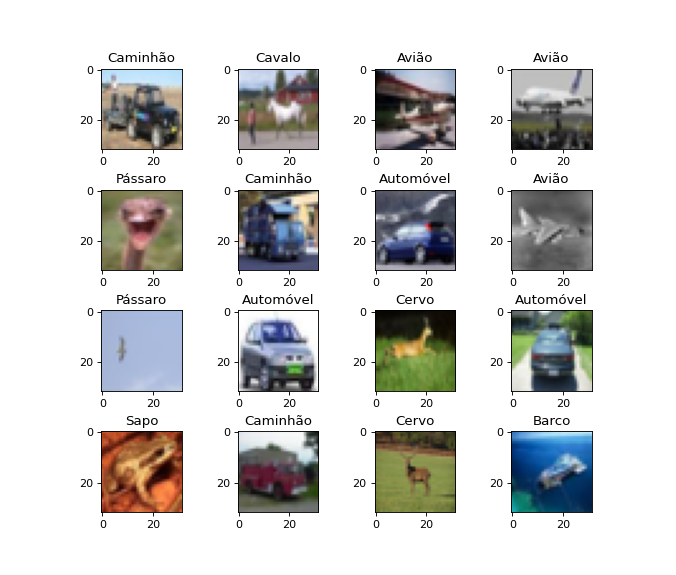

In [109]:
PLT_ROWS, PLT_COLS = 4, 4

fig = plt.Figure(figsize=(8, 8))

for xbatch, ybatch in gen_train:
    for i in range(0, PLT_ROWS*PLT_COLS):
        plt.subplot(PLT_ROWS, PLT_COLS, i+1)
        plt.title(CLASSES[np.argmax(ybatch[i])])
        plt.imshow(xbatch[i])
        PLT_INDEX += 1
    break

plt.subplots_adjust(hspace=0.50)
plt.show()

## 2) Retreine o seu modelo

### 2.1 Compilação e Treinamento

 - Utilizando a mesma função definida na parte A, instancie um novo modelo (com os pesos "zerados").

 
 - Treine esse novo modelo utilizando para treino e validação os objetos definidos pelo *ImageDataGenerator*.
 
 
 - Mostre em um gráfico o comportamento da função custo (loss) e da acurácia, ao longo das epócas, para as bases de treino e de validação.


### 2.2 Desempenho na Base de Teste

 - Após o término do treinamento, calcule as mesmas métricas de desempenho descritas na parte A para a base de teste.


 - Houve melhora no desempenho?

In [110]:
clf_gen = modelo_cifar10()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 15, 15, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 13, 13, 64)        18496     
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               295040    
_________________________________________________________________
dropout1 (Dropout)           (None, 128)               0

In [111]:
clf_gen.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [112]:
clf_history = clf_gen.fit(gen_train, batch_size=120, epochs=40, validation_data=(xtest, ytest))

Epoch 1/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7407 - accuracy: 0.3591 - val_loss: 1.2259 - val_accuracy: 0.5566
Epoch 2/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2100 - accuracy: 0.5708 - val_loss: 1.1231 - val_accuracy: 0.6109
Epoch 3/40
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0433 - accuracy: 0.6332 - val_loss: 0.9892 - val_accuracy: 0.6558
Epoch 4/40
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9318 - accuracy: 0.6723 - val_loss: 0.9118 - val_accuracy: 0.6815
Epoch 5/40
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8614 - accuracy: 0.7007 - val_loss: 0.8902 - val_accuracy: 0.6880
Epoch 6/40
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7960 - accuracy: 0.7215 - val_loss: 0.8899 - val_accuracy: 0.6970
Epoch 7/40
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7423 - accuracy: 0.7398 - val_loss: 0.8779 - val_accuracy:

<IPython.core.display.Javascript object>


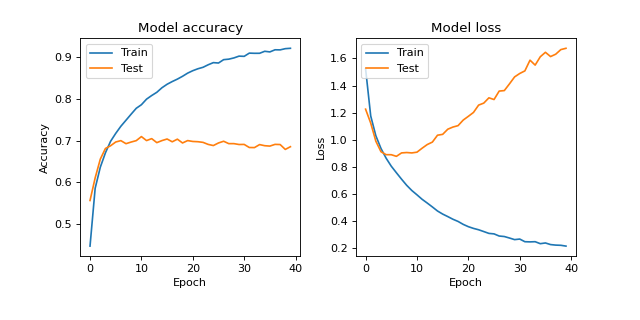

In [113]:
plot_history(clf_history)

In [114]:
LIMIAR = 0.5

pred = clf_gen.predict(xtest)

pred_argmax = [np.argmax(x) for x in (pred > LIMIAR)]
ytest_argmax = [np.argmax(x) for x in ytest]

print(classification_report(y_true=ytest_argmax, y_pred=pred_argmax))

              precision    recall  f1-score   support

           0       0.53      0.71      0.61      1000
           1       0.84      0.75      0.80      1000
           2       0.60      0.60      0.60      1000
           3       0.52      0.50      0.51      1000
           4       0.68      0.55      0.61      1000
           5       0.60      0.59      0.59      1000
           6       0.78      0.75      0.76      1000
           7       0.77      0.70      0.73      1000
           8       0.76      0.83      0.80      1000
           9       0.75      0.80      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

